# Дерево решений

**Дерево принятия решений** — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны признаки, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — признаки, по которым различаются случаи. 

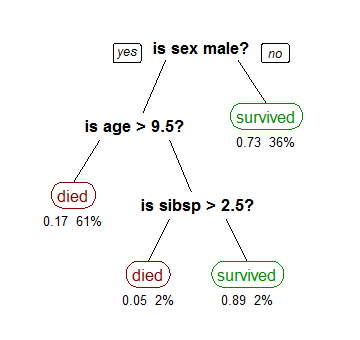

Правила генерируются за счет обобщения множества отдельных наблюдений (обучающих примеров), описывающих предметную область. Поэтому их называют индуктивными правилами, а сам процесс обучения — индукцией деревьев решений.

В обучающем множестве для примеров должно быть задано целевое значение. По типу переменной выделяют два типа деревьев:

- дерево **классификации** — когда целевая переменная дискретная;

- дерево **регрессии** — когда целевая переменная непрерывная.

## Структура дерева решений

Дерево решений — метод представления решающих правил в определенной иерархии, включающей в себя элементы двух типов — узлов (node) и листьев (leaf). Узлы включают в себя решающие правила и производят проверку примеров на соответствие выбранного атрибута обучающего множества.
Простой случай: примеры попадают в узел, проходят проверку и разбиваются на два подмножества:

- первое — те, которые удовлетворяют установленное правило;

- второе — те, которые не удовлетворяют установленное правило.

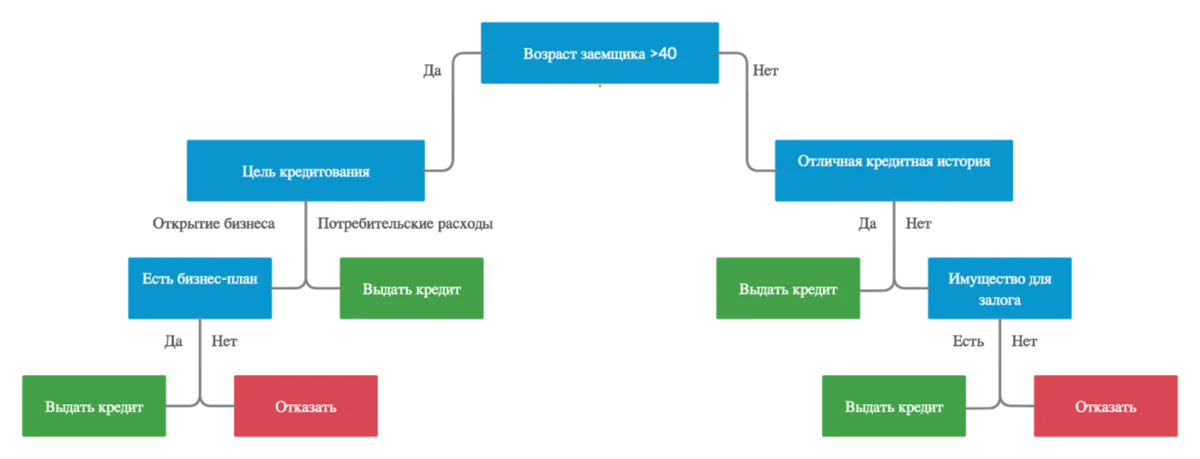

Далее к каждому подмножеству снова применяется правило, процедура повторяется. Это продолжается, пока не будет достигнуто условие остановки алгоритма. Последний узел, когда не осуществляется проверка и разбиение, становится листом.

Лист определяет решение для каждого попавшего в него примера. Для дерева классификации — это класс, ассоциируемый с узлом, а для дерева регрессии — соответствующий листу модальный интервал целевой переменной. В листе содержится не правило, а подмножество объектов, удовлетворяющих всем правилам ветви, которая заканчивается этим листом.

Пример попадает в лист, если соответствует всем правилам на пути к нему. К каждому листу есть только один путь. Таким образом, пример может попасть только в один лист, что обеспечивает единственность решения.


## Какие задачи решает дерево решений?

Его применяют для поддержки процессов принятия управленческих решений, используемых в статистистике, анализе данных и машинном обучении. Инструмент помогает решать следующие задачи:

 - **Классификация**. Отнесение объектов к одному из заранее известных классов. Целевая переменная должна иметь дискретные задачи.

 - **Регрессия** (численное предсказание). Предсказание числового значения независимой переменной для заданного входного вектора.

 - **Описание объектов**. Набор правил в дереве решений позволяет компактно описывать объекты. Поэтому вместо сложных структур, используемых для описания объектов, можно хранить деревья решений.

## Как построить дерево решений?

Основная задача при построении дерева решений — последовательно и рекурсивно разбить обучающее множество на подмножества с применением решающих правил в узлах. Но как долго надо разбивать? Этот процесс продолжают до того, пока все узлы в конце ветвей не станут листами.

Узел становится листом в двух случаях:

- естественным образом — когда он содержит единственный объект или объекты только одного класса;

- после достижения заданного условия остановки алгоритм — например, минимально допустимое число примеров в узле или максимальная глубина дерева.



### Основные этапы построения дерева решений

Построение осуществляется в 4 этапа:

    1. Выбрать атрибут для осуществления разбиения в данном узле.

    2. Определить критерий остановки обучения.

    3. Выбрать метод отсечения ветвей.

    4. Оценить точность построенного дерева.

### Выбор атрибута разбиения

Разбиение должно осуществляться по определенному правилу, для которого и выбирают атрибут. Причем выбранный атрибут должен разбить множество наблюдений в узле так, чтобы результирующие подмножества содержали примеры с одинаковыми метками класса или были максимально приближены к этому. Иными словами — количество объектов из других классов в каждом из этих множеств должно быть как можно меньше.

Критериев существует много, но наибольшей популярностью пользуются теоретико-информационный и статистический.

#### Теоретико-информационный критерий 

В основе критерия лежит информационная энтропия:

$$ H = - \displaystyle\sum_{i=1}^{10} \frac{N}{N_i} \log({\frac{N}{N_i}}) $$

где n — число классов в исходном подмножестве, Ni — число примеров i-го класса, N — общее число примеров в подмножестве.

Энтропия рассматривается как мера неоднородности подмножества по представленным в нем классам. И даже если классы представлены в равных долях, а неопределенность классификации наибольшая, то энтропия тоже максимальная. Логарифм от единицы будет обращать энтропию в ноль, если все примеры узла относятся к одному классу.

Если выбранный атрибут разбиения Aj обеспечивает максимальное снижение энтропии результирующего подмножества относительно родительского, его можно считать наилучшим.

Но на деле об энтропии говорят редко. Специалисты уделяют внимание обратной величине — информации. В таком случае лучшим атрибутом будет тот, который обеспечит максимальный прирост информации результирующего узла относительно исходного:

$$ Gain(A) = Info(S) - Info(S_a) $$

где Info(S) — информация, связанная с подмножеством S до разбиения, Info(Sa) — информация, связанная с подмножеством, полученным при разбиении атрибута A.

Задача выбора атрибута в такой ситуации заключается в максимизации величины Gain(A), которую называют приростом информации. Поэтому теоретико-информационный подход также известен под название «критерий прироста информации.

#### Статистический подход

В основе этого метода лежит использования **индекса Джини**. Он показывает, как часто случайно выбранный пример обучающего множества будет распознан неправильно.
Если говорить проще, то индекс Джини показывает расстояние между распределениями целевых значений и предсказаниями модели. Минимальное значение показателя говорит о хорошей работе модели.

Индекс Джини рассчитывается по формуле:

$$ Gini(Q) = 1 - \displaystyle\sum_{i=1}^{n} p_i^2 $$

где Q — результирующее множество, n — число классов в нем, pi — вероятность i-го класса (выраженная как относительная частота примеров соответствующего класса).

Значение показателя меняется от 0 до 1. Если индекс равен 0, значит, все примеры результирующего множества относятся к одному классу. Если равен 1, значит, классы представлены в равных пропорциях и равновероятны. Оптимальным считают то разбиение, для которого значение индекса Джини минимально.

## Критерий остановки алгоритма

Алгоритм обучения может работать до получения «чистых» подмножеств с примерами одного класса. В таком случае высока вероятность получить дерево, в котором для каждого примера будет создан отдельный лист. Такое дерево не получится применять на практике из-за переобученности. Каждому примеру будет соответствовать свой уникальный путь в дереве. Получится набор правил, актуальный только для данного примера.

Переобучение в случае дерева решений имеет схожие с нейронными сетями последствия. Оно будет точно распознавать примеры из обучения, но не сможет работать с новыми данными. Еще один минус — структура переобученного дерева сложна и плохо поддается интерпретации.

Специалисты решили принудительно останавливать строительство дерева, чтобы оно не становилось «переобученным».

Для этого используют несколько подходов:

   - **Ранняя остановка**
   
   Алгоритм останавливается после достижения заданного значения критерия (например, процентной доли правильно распознанных примеров). Преимущество метода — сокращение временных затрат на обучение. Главный недостаток — ранняя остановка негативно сказывается на точности дерева. Из-за этого многие специалисты советуют отдавать предпочтение отсечению ветей.

   - **Ограничение глубины дерева**
   
   Алгоритм останавливается после достижения установленного числа разбиений в ветвях. Этот подход также негативно сказывается на точности дерева.

   - **Задание минимально допустимого числа примеров в узле**
   
   Устанавливается ограничение на создание узлов с числом примером меньше заданного (например, 7). В таком случае не будут создаваться тривиальные разбиения и малозначимые правила.

#### Отсечение ветвей

Без ограничения «роста» дерево решений станет слишком большим и сложным, что сделает невозможной дальнейшую интерпретацию. А если делать решающие правила для создания узлов, в которые будут попадать по 2-3 примера, они не лишатся практической ценности.

Поэтому многие специалисты отдают предпочтение альтернативному варианту — построить все возможные деревья, а потом выбрать те, которые при разумной глубине обеспечивают приемлемый уровень ошибки распознавания. Основная задача в такой ситуации — поиск наиболее выгодного баланса между сложностью и точностью дерева.

Но и тут есть проблема: такая задача относится к классу NP-полных задач, а они, как известно, эффективных решений не имеют. Поэтому прибегают к методу отсечения ветвей, который реализуется в 3 шага:

    1. Строительство полного дерева, в котором листья содержат примеры одного класса.

    2. Определение двух показателей: относительную точность модели (отношение числа правильно распознанных примеров к общему числу примеров) и абсолютную ошибку (число неправильно классифицированных примеров).

    3. Удаление листов и узлов, потеря которых минимально скажется на точности модели и увеличении ошибки.

Отсечение ветвей проводят противоположно росту дерева, то есть снизу вверх, путем последовательного преобразования узлов в листья.

Главное отличие метода «отсечение ветвей» от преждевременной остановки — получается найти оптимальное соотношение между точностью и понятностью. При этом уходит больше времени на обучение, потому что в рамках этого подхода изначально строится полное дерево.

#### Извлечение правил

Иногда упрощения дерева недостаточно, чтобы оно легко воспринималось и интерпретировалось. Тогда специалисты извлекают из дерева решающие правила и составляют из них наборы, описывающие классы.

Для извлечения правил нужно отслеживать все пути от корневого узла к листьям дерева. Каждый путь дает правило с множеством условий, представляющих собой проверку в каждом узле пути.

Если представить сложное дерево решений в виде решающих правил (вместо иерархической структуры узлов), оно будет проще восприниматься и интерпретироваться.

## Пример решения задачи классификации

**Импорт библиотек и чтение датафрейма**

В датафрейме информация о зарплате(в условных единицах), возрасте и решении о выдаче кредита человеку. В нашем случае кредит выдается всем, у кого зарплата выше 7 условных единиц и возраст от 30 до 60 лет.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import datasets

In [2]:
df = pd.read_excel('/home/mary/samsung/credit.xlsx', sheet_name='Лист1')
df.head()

,salary,age,credit
0,1,33,0
1,2,53,0
2,3,43,0
3,4,63,0
4,5,52,0


In [3]:
x = df.drop('credit', axis=1)
y = df['credit']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
tree = DecisionTreeClassifier(max_depth=4)

In [6]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [7]:
tree.score(x_test, y_test)

1.0

In [8]:
export_graphviz(tree, out_file='tree_pic.dot', feature_names=x.columns, filled=True)

In [9]:
! dot -Tpng tree_pic.dot -o tree_pic.png

<img src='tree_pic.png'>

# Пример поинтереснее

In [10]:
df = pd.read_csv('/home/mary/samsung/diabetes_csv.csv')
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [11]:
df['class'] = df['class'].factorize()[0]
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0


In [12]:
x = df.drop('class', axis=1)
y = df['class']


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
tree = DecisionTreeClassifier()

In [15]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
y_predicted = tree.predict(x_test)
y.head()

0    0
1    1
2    0
3    1
4    0
Name: class, dtype: int64

In [17]:
print('Результат на обучающей выборке:', tree.score(x_train, y_train))
print('Результат на тестовой выборке:', tree.score(x_test, y_test))

Результат на обучающей выборке: 1.0
Результат на тестовой выборке: 0.658008658008658


In [18]:
export_graphviz(tree, out_file='diabetes1.dot', feature_names=x.columns, filled=True)

In [19]:
! dot -Tpng diabetes1.dot -o diabetes1.png

<img src='diabetes1.png'>

Дерево явно переобучилось. Попробуем поиграться с параметрами.

## max_depth

In [20]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x_train, y_train)
print('Результат на обучающей выборке:', tree.score(x_train, y_train))
print('Результат на тестовой выборке:', tree.score(x_test, y_test))

Результат на обучающей выборке: 0.8361266294227188
Результат на тестовой выборке: 0.70995670995671


In [26]:
export_graphviz(tree, out_file='diabetes9.dot', feature_names=x.columns, filled=True)
! dot -Tpng diabetes9.dot -o diabetes9.png

<img src='diabetes9.png'>

## max_features

In [22]:
tree = DecisionTreeClassifier(criterion='entropy', max_features=2)
tree.fit(x_train, y_train)
print('Результат на обучающей выборке:', tree.score(x_train, y_train))
print('Результат на тестовой выборке:', tree.score(x_test, y_test))

Результат на обучающей выборке: 1.0
Результат на тестовой выборке: 0.696969696969697


In [23]:
export_graphviz(tree, out_file='diabetes7.dot', feature_names=x.columns, filled=True)
! dot -Tpng diabetes7.dot -o diabetes7.png

<img src='diabetes7.png'>

## min_samples_leaf

In [24]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=36)
tree.fit(x_train, y_train)
print('Результат на обучающей выборке:', tree.score(x_train, y_train))
print('Результат на тестовой выборке:', tree.score(x_test, y_test))

Результат на обучающей выборке: 0.8119180633147114
Результат на тестовой выборке: 0.70995670995671


In [25]:
export_graphviz(tree, out_file='diabetes6.dot', feature_names=x.columns, filled=True)
! dot -Tpng diabetes6.dot -o diabetes6.png

<img src='diabetes5.png'>

## Преимущества и недостатки дерева решений 

**Преимущества:**

- Формируют четкие и понятные правила классификации. Например, «если возраст < 40 и нет имущества для залога, то отказать в кредите». То есть деревья решений хорошо и быстро интерпретируются.

- Способны генерировать правила в областях, где специалисту трудно формализовать свои знания.

- Легко визуализируются, то есть могут «интерпретироваться» не только как модель в целом, но и как прогноз для отдельного тестового субъекта (путь в дереве).

- Быстро обучаются и прогнозируют.

- Не требуется много параметров модели.

- Поддерживают как числовые, так и категориальные признаки.

**Недостатки:**

- Деревья решений чувствительны к шумам во входных данных. Небольшие изменения обучающей выборки могут привести к глобальным корректировкам модели, что скажется на смене правил классификации и интерпретируемости модели.

- Разделяющая граница имеет определенные ограничения, из-за чего дерево решений по качеству классификации уступает другим методам.

- Возможно переобучение дерева решений, из-за чего приходится прибегать к методу «отсечения ветвей», установке минимального числа элементов в листьях дерева или максимальной глубины дерева.

- Сложный поиск оптимального дерева решений: это приводит к необходимости использования эвристики типа жадного поиска признака с максимальным приростом информации, которые в конечном итоге не дают 100-процентной гарантии нахождения оптимального дерева.

- Дерево решений делает константный прогноз для объектов, находящихся в признаковом пространстве вне параллелепипеда, который охватывает не все объекты обучающей выборки.